需要import的lib都放在這~

In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""Helper of data_mining from TA
Helper functions for data mining lab session 2018 Fall Semester
Author: Elvis Saravia
Email: ellfae@gmail.com
"""

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(col):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in col:
        if element == True:
            counter+=1
    return ("The amount of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        """split a text to sentences"""
        for word in nltk.word_tokenize(d, language='english'):
            "split sentence to words"
            # filters here
            tokens.append(word)
    return tokens

準備我們要使用的dataset

In [3]:
""" Prepare dataset
    這個dataset 有20個種類,而我們這次練習先拿出4類來用就好
"""
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [ ]:
# 用這個指令可以看到twenty_train有甚麼attribute
dir(twenty_train)

In [4]:
"""Transfer data to a pandas Dataframe"""
import pandas as pd

# construct dataframe from a list
# 我們只有把資料當中的list提取出來之後做資料轉換
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])


In [5]:
"""把原始資料當中的其他column也加入到這個轉換當中"""
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: format_labels(t, twenty_train))

In [6]:
"""拿來確定上面cell中的t是幹嘛用的"""
## lambda t: format(t,twenty_train)的意思是 t是 input, format_labels(t,twenty_train))是output
## 而加上了apply之後，就是把X.category當作 function 的 input
## 用下面的code 可以確認t是甚麼
# X.category.apply(lambda t: (print(t),format_labels(t, twenty_train)))
# print("#"*50)
# X.category
check = 1
#這個check沒有意義，我只是想讓這個cell在縮小後還可以留著勾勾

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise2!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Experiment with other querying techniques using pandas dataframes. 
        Refer to their documentation for more information.

In [7]:
print("Show data by loc:")
print(X.loc[0])
print("---"*10)
print("Show data by using a range indexing")
print(X[0:1])
print("---"*10)
print("Checking if we get identity data by two different ways")
check = (X.loc[0] == X[0:1])
print(check)


Show data by loc:
text             From: sd345@city.ac.uk (Michael Collier) Subje...
category                                                         1
category_name                                        comp.graphics
Name: 0, dtype: object
------------------------------
Show data by using a range indexing
                                                text  category  category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
------------------------------
Checking if we get identity data by two different ways
   text  category  category_name
0  True      True           True


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise2!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                               Done.
            Cell just above this doc is the ans of Exercise2.

In [8]:
"""提取特定的column、row"""
X[:10][["text","category_name"]]    
X[:10][["text"]]

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4,From: stanly@grok11.columbiasc.ncr.com (stanly...
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...
7,From: aldridge@netcom.com (Jacquelin Aldridge)...
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...


In [9]:
"""提取特定的category"""
# 找出符合條件的index
index_we_want = (X['category_name'] == "sci.med")
X[index_we_want]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [10]:
"""檢查表格當中有沒有不含有資料的"""
X.isnull()      # returning false means data exist correctly
# 把X.isnull的結果作為x輸入到 check_missing_value裡面
X.isnull().apply(lambda x: check_missing_values(x))
#-----------上述操作與下述的code等價------------------
# check_result = X.isnull()
# print(check_result)
# check_missing_values(check_result)

,text,category,category_name
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,0


In [11]:
"""去除data中不合法的資料(某一個column存在null"""
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
"""檢查dummy_series長怎麼樣"""
# print(dummy_series.to_frame())
# print("---"*10)
# print(dummy_series.to_frame().T)
"""把我們自己做出來的dummy series放到data當中"""
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
""" check if the records was commited into result """
X.isnull().apply(lambda x: check_missing_values(x))
# 我們新增的資料沒有category_name，所以理論上這次檢查, null應該要多一個
""" 刪除有null val的資料"""
X.dropna(inplace=True)
"""check result again"""
X.isnull().apply(lambda x: check_missing_values(x))

,text,category,category_name
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,0


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise5!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            Please check the data and the process below.
            Describe what you observe and why it happened.

In [12]:
import numpy as np

NA_dict = [ 
            { 'id': 'A', 'missing_example': np.nan },
            { 'id': 'B'                    },
            { 'id': 'C', 'missing_example': 'NaN'  },
            { 'id': 'D', 'missing_example': 'None' },
            { 'id': 'E', 'missing_example':  None  },
            { 'id': 'F', 'missing_example': ''     }
        ]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

在上面那個cell的資料當中，理論上所有的missing_example都代表著無效的資料
也因此，我們的NA_df['missing_example'].isnull()理論上應該要return 6個true
但因為資料用了不同的方法去表示，有一些並沒有被isnull抓出來
因此才會有一些資料逃過了isnull的檢查，也就可能會產生bug

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise5!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                               Done.
            Cell just above this doc is the ans of Exercise5.

In [13]:
"""檢查有沒有重複的資料"""
X.duplicated()
checkDuplicate = sum(X.duplicated())
# 把X.duplicated()的回傳值都加起來
# 若沒有重複會回傳false(0) 
# 所以如果sum不是0 代表有資料重複
if checkDuplicate:
    print("Duplicated data exist")

In [14]:
"""處理掉重複的資料"""
"""先自己新增做出重複的資料"""
dummy_duplicate_dict = [{
                            'text': 'dummy record',
                            'category': 1, 
                            'category_name': "dummy category"
                        },
                        {
                            'text': 'dummy record',
                            'category': 1, 
                            'category_name': "dummy category"
                        }]
dummy_data = pd.DataFrame(dummy_duplicate_dict)
"""把資料放進data當中"""
X = pd.concat([X,dummy_data],ignore_index=True);
"""在去除重複的資料前先看一下是不是真的有重複(實際上沒有做ㄉ必要啦)"""
sum(X.duplicated())
"""把重複的資料刪掉"""
X.drop_duplicates(keep=False, inplace=True) # 所有重複的資料都刪掉
X.drop_duplicates(keep="first", inplace=True) # 重複的資料保留排序較前的那一筆
X.drop_duplicates(keep="last", inplace=True) # 重複的資料保留排序較後的那一筆
"""檢查結果~"""
sum(X.duplicated())

0

In [15]:
"""接著是資料的採樣"""
X_sample1 = X.sample(n=1000)
X_sample2 = X.sample(n=1000)

In [16]:
X_sample1[0:4]
X_sample2[0:4]

,text,category,category_name
1535,From: shredder@telerama.pgh.pa.us (Ed Sayre) S...,3,soc.religion.christian
1234,From: yoo@engr.ucf.edu (Hoi Yoo) Subject: Ribb...,1,comp.graphics
652,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,0,alt.atheism
1791,From: heath@athena.cs.uga.edu (Terrance Heath)...,3,soc.religion.christian


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise6!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        Notice any changes to the X dataframe? What are they?

                            抱歉ㄌ，我不知道QAQ
                       我看起來sampling並沒有造成影響

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise6!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                Done.
            Cell just above this doc is the ans of Exercise6.

In [17]:
# 統計每個種類有多少數量
print(X.category_name.value_counts())
print(X_sample1.category_name.value_counts())
print(X_sample2.category_name.value_counts())
X1_cnt = X_sample1.category_name.value_counts()
X2_cnt = X_sample2.category_name.value_counts()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
soc.religion.christian    272
sci.med                   258
comp.graphics             258
alt.atheism               212
Name: category_name, dtype: int64
soc.religion.christian    266
sci.med                   265
comp.graphics             245
alt.atheism               224
Name: category_name, dtype: int64


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise8!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Do a side-by-side comparison of the distribution between the two datasets

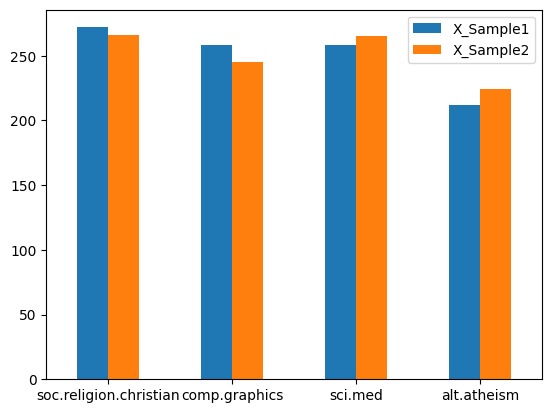

In [18]:
"""Answer of Ex.8"""
index = ['soc.religion.christian','comp.graphics','sci.med','alt.atheism']
compare = pd.DataFrame({'X_Sample1': X1_cnt,'X_Sample2': X2_cnt},index = index)

ax = compare.plot.bar(rot = 0)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise8!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                  Done.
              Cell just above this doc is the ans of Exercise8.

<AxesSubplot: title={'center': 'Category distribution'}>

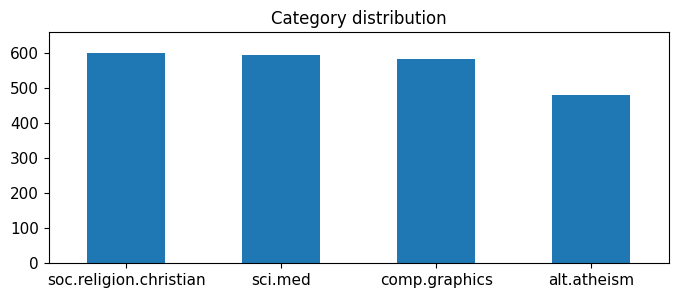

In [19]:
# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(X.category_name.value_counts()) * 1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

# 可以看我們plt能畫出哪幾種圖
# print(plt.style.available)

切著示範如何將text當中的字切成一個一個unit

In [20]:
"""檢查一下text裡面到底長怎麼樣"""
print(type(X[0:1]['text']))
print("---" * 3)
print((X[0:1]['text']).shape)
X[0:1]['text'][0]

<class 'pandas.core.series.Series'>
---------
(1,)


'From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. '

In [21]:
"""檢查特定的字詞出現的次數"""
"為X新增一個colume,把text中的每一個unit切出來"
# print("Shape before adding a col")
# print(X[:1].shape)
X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))
# print("Shape after addinng a col")
# print(X[:1].shape)


"""統計各unit出現的次數"""
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 
#learn the vocabulary and return document-term matrix
print(X_counts.shape)
# output should be(2257,35788)
# 表示總共有2257筆資料
# 而在這2257筆資料當中，總共有35788個token

"""把前5筆資料當中的前100個token 拉出來做成array"""
X_counts[0:5, 0:100].toarray()
"""可以透過這個來取出特定index的token"""
count_vect.get_feature_names_out()[0:1]


(2257, 35788)


array(['00'], dtype=object)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise10!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        Another 1 exist in the fifth record, try to find the word.
                    Do it as efficient as possible

In [22]:
"""Answer of Exercise 10"""
index_of_unit = (X_counts[4:5].toarray() == 1)
result = (count_vect.get_feature_names_out()[index_of_unit[0]])[1:2]

"""用來確認我們上面的程式對不對"""
count_vect.get_feature_names_out()[37:38]

array(['01'], dtype=object)

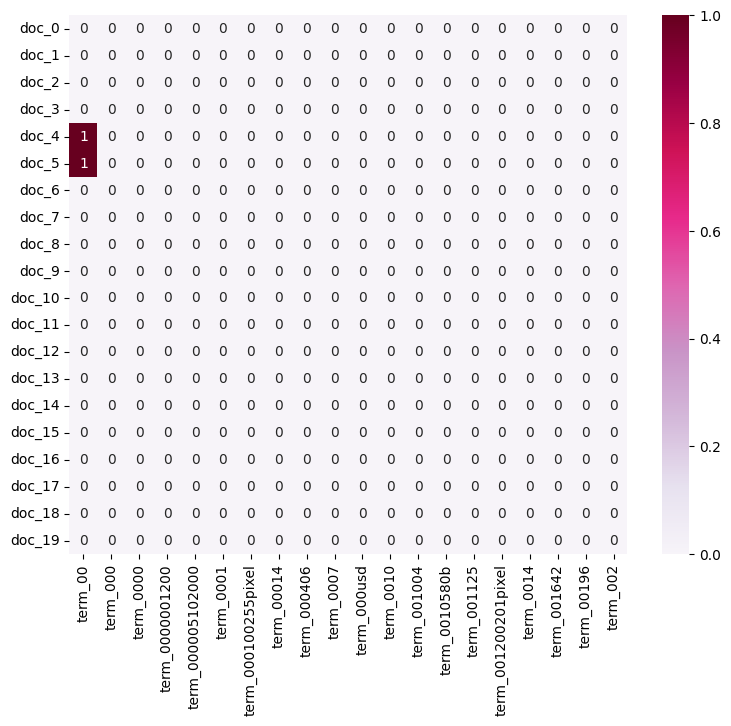

In [23]:
"""將統計數據用圖表畫出來"""
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

# 前20個資料的前20個token
plot_z = X_counts[0:20, 0:20].toarray()

"""畫出heatmap"""
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise11!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                         我們可以發現整個矩陣非常的稀疏
                    試著找出方法讓我們可以得到更能夠解讀的資料

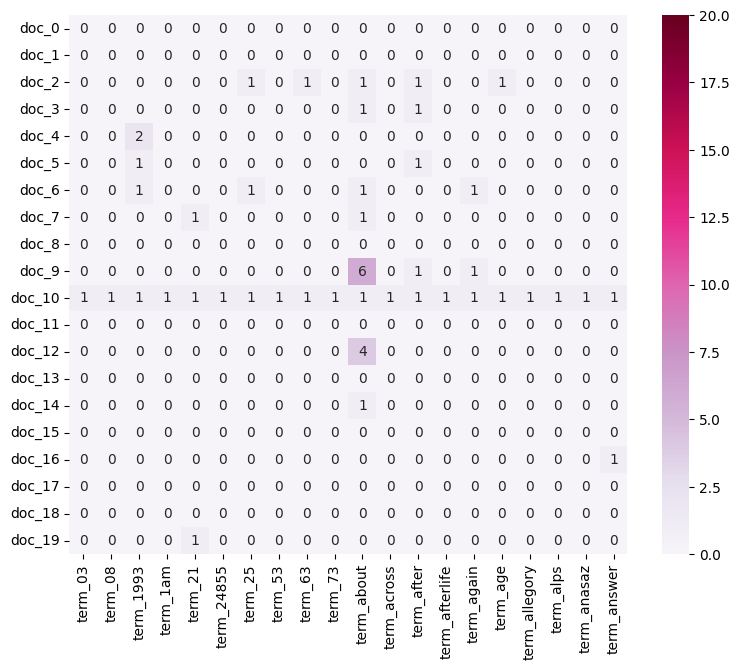

In [24]:
"""Answer of Ex11"""
max_unigram_id = 10000
max_doc = 0
max_amount = 0
for doc in range(0,20):
    index_of_unit = (X_counts[doc:doc + 1,:max_unigram_id].toarray() == 1)
    amount = sum(index_of_unit[0])
    if amount > max_amount:
        max_amount = amount
        max_doc = doc
max_amount = 20

index_of_target_unigram = (X_counts[max_doc:max_doc + 1].toarray() == 1)
target_unigram = count_vect.get_feature_names_out()[index_of_target_unigram[0]][:max_amount]

plot_x = ["term_"+str(i) for i in target_unigram[:max_amount]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = (X_counts[0:20, index_of_target_unigram[0]].toarray())


import seaborn as sns

df_todraw = pd.DataFrame(plot_z[:,:max_amount], columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=max_amount, annot=True)

#   Exercise 11說明
首先我先決定了要看幾組data，依照前面的範例，我選擇了20組
接著我算出每一組data含有多少種不同的unigram，希望找出含有最多的unigram的data
找到這一組data之後，選擇一定數量的unigram當作我們圖表的x軸，而這就是由max_amount這變數決定
最後就是針對這20組data，去找出這些unigram出現的數量


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise11!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                  Done.
            Cell just above this doc is the ans of Exercise11.

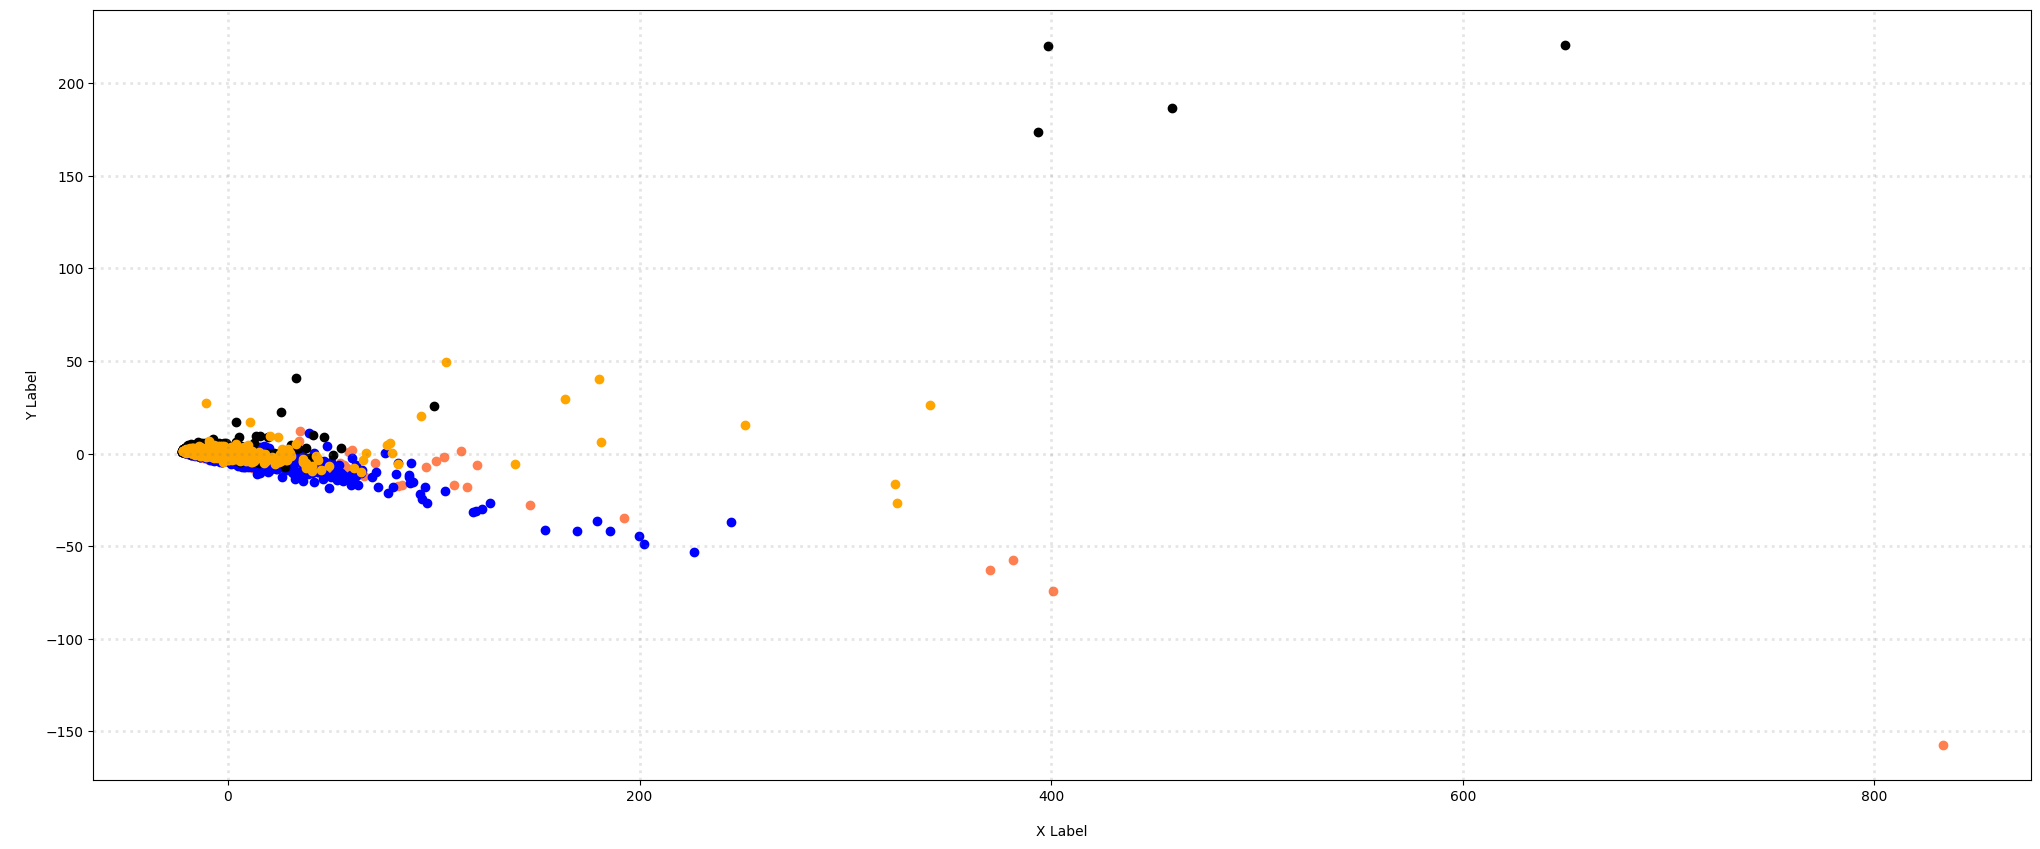

In [25]:
"""PCA主成分分析"""
# 因為我們資料當中的unigram相當的多，所以我們整體維度就高的不可思議，因次需要降維

from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

colors = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for color, category in zip(colors, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, c = color, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise12!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                    將資料化簡為3D的資料，之後使用3-D plot來呈現

Text(0.5, 0, '\nZ Label')

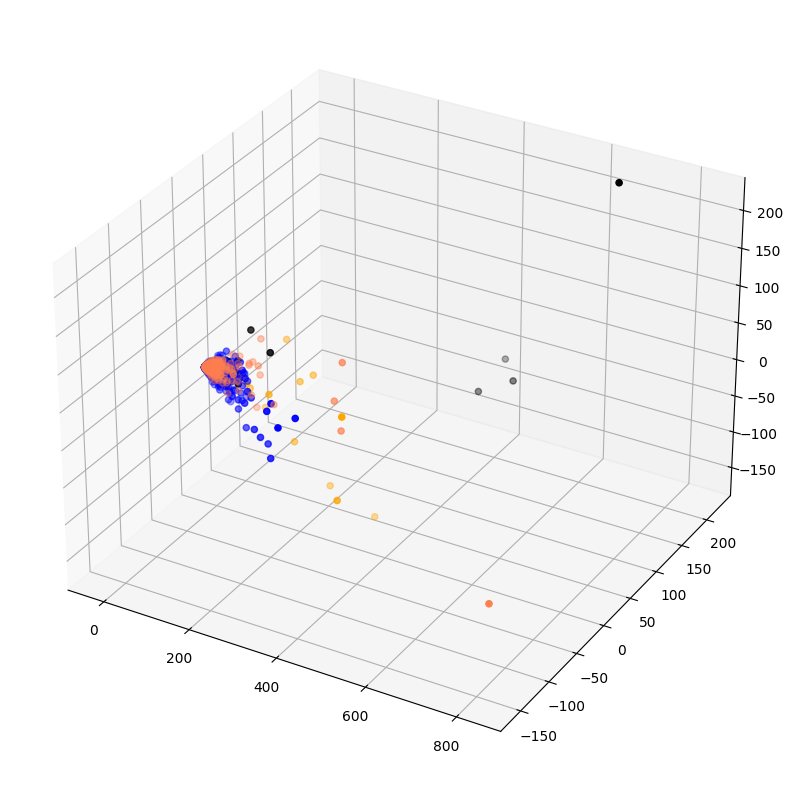

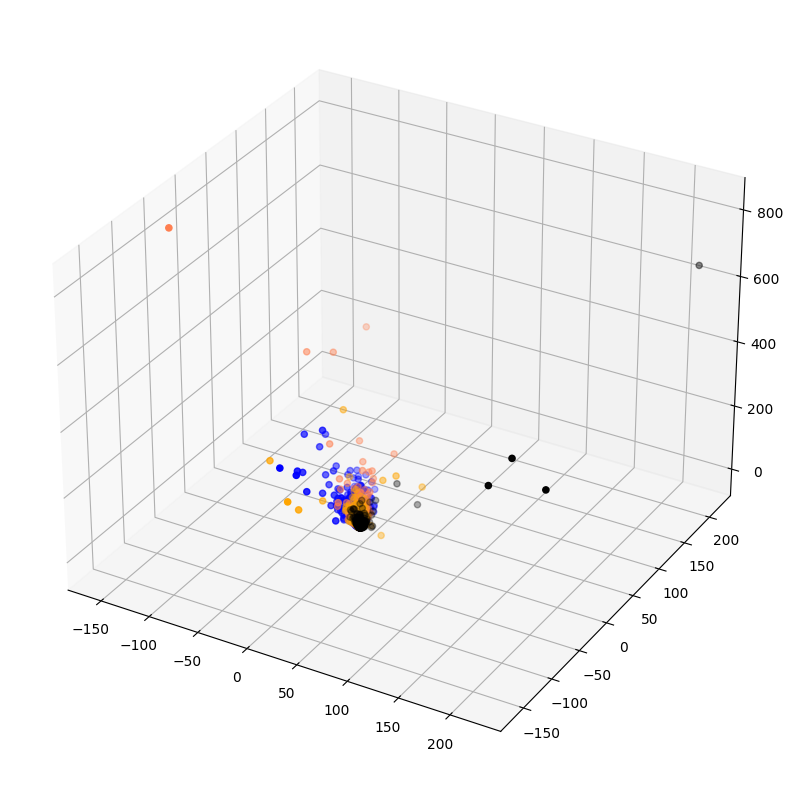

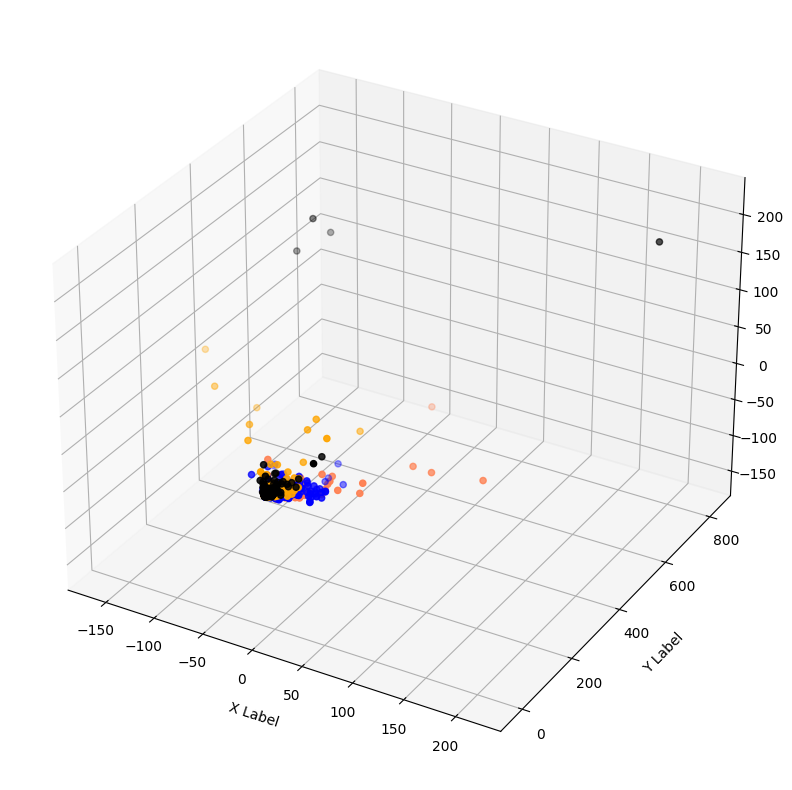

In [26]:
"""Answer of Ex12"""
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

colors = ['coral', 'blue', 'black', 'orange']

# plot
for i in range(0,3):
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(projection='3d')

    for color, category in zip(colors, categories):
        xs = X_reduced[X['category_name'] == category].T[i % 3]
        ys = X_reduced[X['category_name'] == category].T[(i + 1) % 3]
        zs = X_reduced[X['category_name'] == category].T[(i + 2) % 3]
        ax.scatter(xs, ys, zs, c = color, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise12!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                  Done.
            Cell just above this doc is the ans of Exercise12.

In [27]:
term_frequencie = []
for j in range(0,X_counts.shape[1]):
    term_frequencie.append(sum(X_counts[:,j].toarray()))

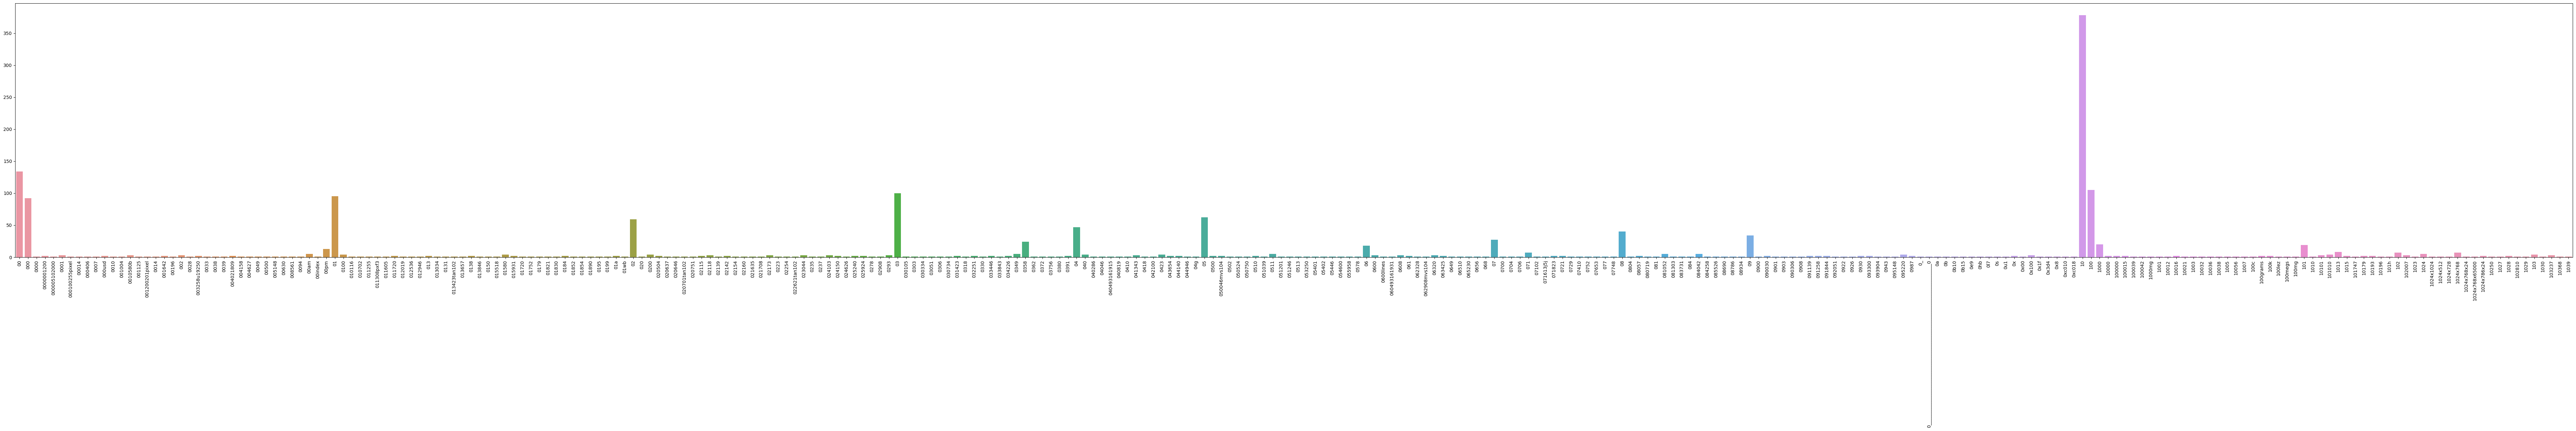

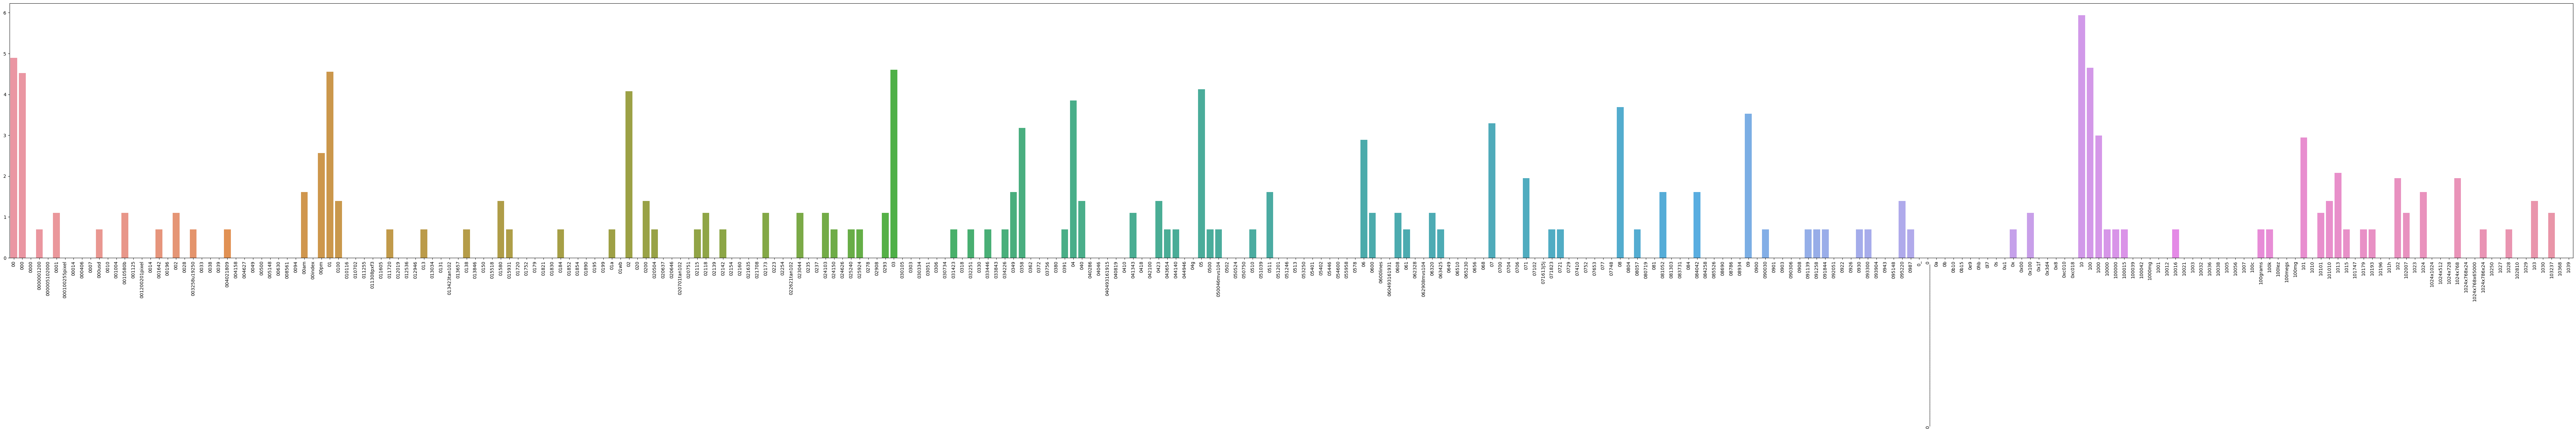

In [28]:
"""統計對於所有document(2257筆) 單一token的出現頻率"""
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# 代表第一個token出現的頻率
term_frequencies[0] 
"""使用圖表來表示所有字詞出現的頻率"""
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
"""因為字詞頻率出現的差異太大,可以用log來表示,比較好看一點"""
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise13!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                    Use plotly for a better visualization

In [29]:
"""Answer of Ex13"""
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)


fig = px.bar(   
                term_frequencies_log, 
                x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300]
            )

fig.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise13!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                  Done.
            Cell just above this doc is the ans of Exercise13.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise13!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                    Reduce the computational intensity

In [30]:
"Answer of Ex14"
total_frequency = sum(term_frequencies.tolist())
mean_frequency = total_frequency / len(term_frequencies)
mean_frequency

target_id = []
target_freq = []
for index,freq in enumerate(term_frequencies):
    if freq > mean_frequency:
        target_id.append(index)
        target_freq.append(freq)

from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)


fig = px.bar(   
                target_freq,
                x=count_vect.get_feature_names_out()[target_id[:len(target_id) // 10]],
                y=target_freq[:len(target_id) // 10]
            )

fig.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise14!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                  Done.
            Cell just above this doc is the ans of Exercise14.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise15!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                    visualize the data, sort by frequncy

In [38]:
"""Answer of Ex15"""
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)


fig = px.bar(   
                target_freq,
                x=count_vect.get_feature_names_out()[target_id[:len(target_id) // 10]],
                y=target_freq[:len(target_id) // 10]
            )
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise15!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                Done.
            Cell just above this doc is the ans of Exercise15.

In [34]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise16!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  Try to generate the binarization using the category_name column instead

In [35]:
"""Answer of Ex16"""
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise16!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                                Done.
            Cell just above this doc is the ans of Exercise16.

In [36]:
"""Data Exploration"""
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print("---" * 10)
print(document_to_transform_2)
print("---" * 10)
print(document_to_transform_3)
print("---" * 10)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 